# Центральная предельная теорема своими руками.

In [1]:
import math as mt
import pandas as pd
import numpy as np
import scipy.stats as sts
from scipy.stats import chi2

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.style.use(['fivethirtyeight'])

## В качестве непрерывного распределения выбираем хи-квадрат ($\chi^2$) распределение.
Данное распределение имеет один параметр $k$, который также называется степенью свободы (degrees of freedom, df). Математическое ожидание $\mathbf{E}X = k$ и дисперсия $\mathbf{D}X = 2k$. Объем выборки обозначим $n$.

In [3]:
df = 5
n = 1000
# сгенеруем выборку объема 1000 из распределения
r = chi2.rvs(df, size=n)
# расчитаем теоритеческую плотность вероятности (pdf - probability density function) для распределения
x = np.linspace(chi2.ppf(0.001, df), chi2.ppf(0.999, df), 1000)
# дисперсия
var = chi2.var(df)
# среднее значение
mean = chi2.mean(df)

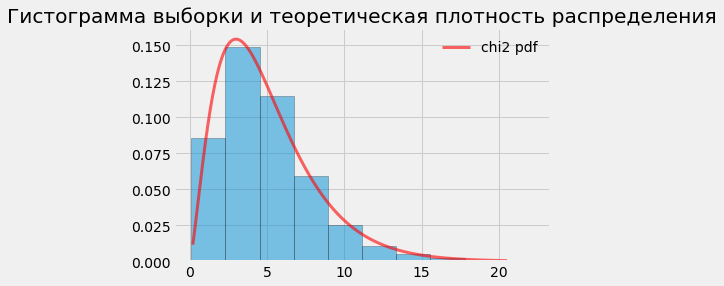

In [4]:
# построим гистограмму выборки и наложим на нее теоретическую оценку плотности вероятности 
plt.plot(x, chi2.pdf(x, df), 'r-', lw=3, alpha=0.6, label='chi2 pdf')
plt.hist(r, density=True, alpha=0.5, edgecolor = 'black')
plt.title('Гистограмма выборки и теоретическая плотность распределения')
plt.legend(loc='best', frameon=False)
plt.show()

Вывод: как видно на графике выше, гистограмма выборки хорошо совпадает с теоретической оценкой плотности вероятности рассматриваемого распределения.

## Оценка распределение выборочного среднего. Изобразим гистограммы и наложим на них нормальное распределение.

In [94]:
# генерируем выборку объемом n
n = 5
# создаем список для хранения выборочных средних
sample_mean = [] 
# цикл по выборкам
for i in range(1000): 
    # генерируем выборку объема n
    sample_tmp = chi2.rvs(df, size=n) 
    # вычисляем выборочное среднее как среднее арифметическое
    sample_avg = sum(sample_tmp) / n  
    # добавляем полученное значение в список
    sample_mean.append(sample_avg) 
# переходим от списка к массиву numpy
sample_mean = np.array(sample_mean) 

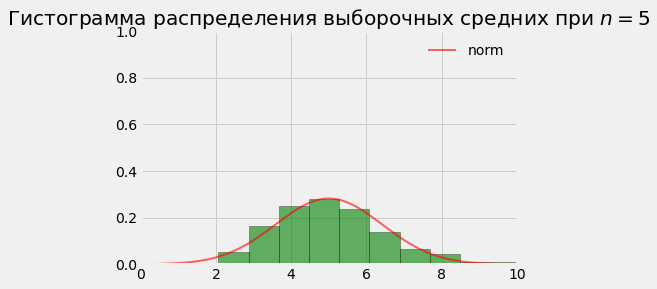

In [95]:
# создаем случайную, нормально распределенную величину
x = np.linspace(0, 20, 1000)
norm = sts.norm(loc=mean, scale=(mt.sqrt(var/n)))
pdf = norm.pdf(x)
# рисуем
plt.plot(x, pdf, 'r-', lw=2, alpha=0.6, label='norm')
plt.hist(sample_mean, density=True, alpha=0.6, edgecolor = 'black', color='g')
plt.title('Гистограмма распределения выборочных средних при $n=5$')
plt.legend(loc='best', frameon=False)
plt.ylim(0, 1)
plt.xlim(0, 10)
plt.show()

In [96]:
# генерируем выборку объемом n
n = 10
# создаем список для хранения выборочных средних
sample_mean = [] 
# цикл по выборкам
for i in range(1000): 
    # генерируем выборку объема n
    sample_tmp = chi2.rvs(df, size=n) 
    # вычисляем выборочное среднее как среднее арифметическое
    sample_avg = sum(sample_tmp) / n  
    # добавляем полученное значение в список
    sample_mean.append(sample_avg) 
# переходим от списка к массиву numpy
sample_mean = np.array(sample_mean) 

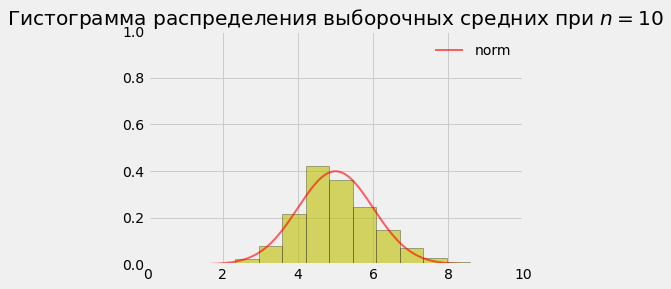

In [98]:
# создаем случайную, нормально распределенную величину
norm = sts.norm(loc=mean, scale=(mt.sqrt(var/n)))
pdf = norm.pdf(x)
# рисуем
plt.plot(x, pdf, 'r-', lw=2, alpha=0.6, label='norm')
plt.hist(sample_mean, density=True, alpha=0.6, edgecolor = 'black', color='m')
plt.title('Гистограмма распределения выборочных средних при $n=10$')
plt.legend(loc='best', frameon=False)
plt.ylim(0, 1)
plt.xlim(0, 10)
plt.show()

In [104]:
# генерируем выборку объемом n
n = 50
# создаем список для хранения выборочных средних
sample_mean = [] 
# цикл по выборкам
for i in range(1000): 
    # генерируем выборку объема n
    sample_tmp = chi2.rvs(df, size=n) 
    # вычисляем выборочное среднее как среднее арифметическое
    sample_avg = sum(sample_tmp) / n  
    # добавляем полученное значение в список
    sample_mean.append(sample_avg) 
# переходим от списка к массиву numpy
sample_mean = np.array(sample_mean) 

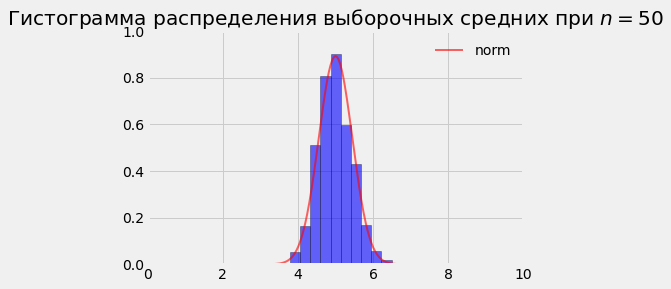

In [105]:
# создаем случайную, нормально распределенную величину
norm = sts.norm(loc=mean, scale=(mt.sqrt(var/n)))
pdf = norm.pdf(x)
# рисуем
plt.plot(x, pdf, 'r-', lw=2, alpha=0.6, label='norm')
plt.hist(sample_mean, density=True, alpha=0.6, edgecolor = 'black', color='b')
plt.title('Гистограмма распределения выборочных средних при $n=50$')
plt.legend(loc='best', frameon=False)
plt.ylim(0, 1)
plt.xlim(0, 10)
plt.show()

### Вывод
Из приведенных выше графиков видно, что центральная предельная теорема хорошо выполняется даже на небольших выборках из хи-квадрат распределения, так как оно является не сильно скошенным и близким по форме к нормальному (при $k=5$). При увеличении размера выборки $n$ гистограмма выборочных средних все больше приближается к плотности нормального распределения. Также видно, что при увеличении размера выборки $n$ пик становится все выше (дисперсия обратно пропорциональна $n$). В целом наблюдается отличное соответствие полученных результатов центральной предельной теореме.